# Linear Regression

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [179]:
df = pd.read_csv('../data/weight-height.csv')

In [180]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


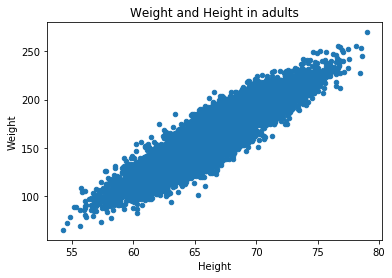

In [181]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

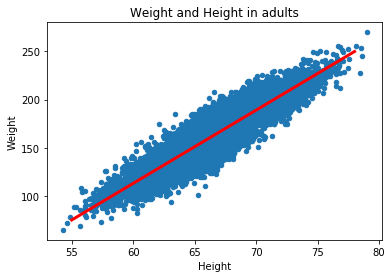

In [182]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [183]:
def line(x, w=0, b=0):
    return x * w + b

In [184]:
x = np.linspace(55, 80, 100)

In [185]:
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [186]:
yhat = line(x, w=3.6671348097071821, b=0)

In [187]:
yhat

array([ 201.69241453,  202.61845868,  203.54450282,  204.47054697,
        205.39659111,  206.32263525,  207.2486794 ,  208.17472354,
        209.10076768,  210.02681183,  210.95285597,  211.87890012,
        212.80494426,  213.7309884 ,  214.65703255,  215.58307669,
        216.50912084,  217.43516498,  218.36120912,  219.28725327,
        220.21329741,  221.13934156,  222.0653857 ,  222.99142984,
        223.91747399,  224.84351813,  225.76956227,  226.69560642,
        227.62165056,  228.54769471,  229.47373885,  230.39978299,
        231.32582714,  232.25187128,  233.17791543,  234.10395957,
        235.03000371,  235.95604786,  236.882092  ,  237.80813614,
        238.73418029,  239.66022443,  240.58626858,  241.51231272,
        242.43835686,  243.36440101,  244.29044515,  245.2164893 ,
        246.14253344,  247.06857758,  247.99462173,  248.92066587,
        249.84671001,  250.77275416,  251.6987983 ,  252.62484245,
        253.55088659,  254.47693073,  255.40297488,  256.32901

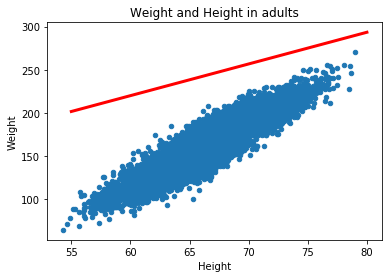

In [188]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [189]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [190]:
X = df[['Height']].values
y_true = df['Weight'].values

In [191]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [192]:
y_pred = line(X)

In [193]:
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [194]:
# Flatten the array
y_pred.ravel()

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [195]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

In [196]:
((sum(y_true)*np.sum(np.multiply(X,X))) - (sum(x)*np.sum(np.multiply(X,y_true)))) / ((len(X) * np.sum(np.multiply(X,X))) - np.sum(np.multiply(X,X))**2)

3.6671348097071821

In [197]:
np.sum(np.multiply(X,X))

44194549.801026456

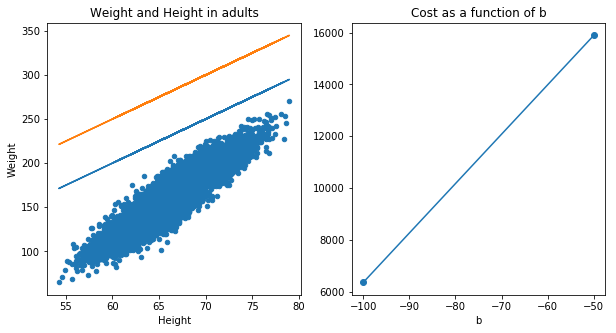

In [198]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=5, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [199]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [200]:
# can add layers to model sequentially
model = Sequential()

In [201]:
# add Dense layer, 1 output value, only one number  as input (1,)
model.add(Dense(1, input_shape=(1,)))

In [202]:
# (None, 1) can accept any amount of inputs as long as they are a single numer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [203]:
# implement this as a tensor flow model
# loss and cost function is the same thins
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [204]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 644.0085     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 561.9633     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 463.6365     
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 425.4950     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 393.6308     
Epoch 6/40
10000/10000 [==============================] - ETA: 0s - loss: 354.189 - 0s - loss: 349.8605     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 324.2425     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 289.6515     
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 265.7198     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 263.4831     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 223.3814     
Epoch 12/40
10000/10000 [==============================] - 

In [205]:
y_pred = model.predict(X)

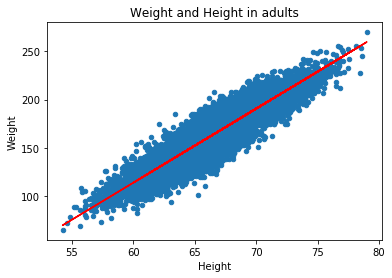

In [206]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [207]:
# We can get the weights of the parameters, as we can see here
W, B = model.get_weights()

In [208]:
W

array([[ 7.69698429]], dtype=float32)

In [209]:
B

array([-348.17254639], dtype=float32)

## Evaluating Model Performance

In [210]:
from sklearn.metrics import r2_score

In [211]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.854


### Train Test Split

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [214]:
len(X_train)

8000

In [215]:
len(X_test)

2000

In [216]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [217]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [218]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [219]:
from sklearn.metrics import mean_squared_error as mse

In [220]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	292.6
The Mean Squared Error on the Test set is:	279.0


In [221]:
# R2 is the difference between our models performance and a model that always picks the average score of Y's
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.712
The R2 score on the Test set is:	0.743


# Classification

In [222]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [223]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


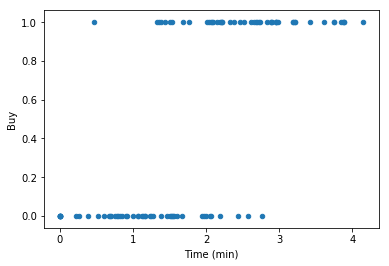

In [224]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [225]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [226]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [227]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [228]:
X = df[['Time (min)']].values
y = df['Buy'].values
print(X[:5])
print(y[:5])

[[ 2.        ]
 [ 0.68333333]
 [ 3.21666667]
 [ 0.9       ]
 [ 1.53333333]]
[0 0 1 0 1]


In [229]:
model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s - loss: 0.6178 - acc: 0.5800     
Epoch 2/25
100/100 [==============================] - 0s - loss: 0.5837 - acc: 0.7400     
Epoch 3/25
100/100 [==============================] - 0s - loss: 0.5579 - acc: 0.8000     
Epoch 4/25
100/100 [==============================] - 0s - loss: 0.5288 - acc: 0.8000     
Epoch 5/25
100/100 [==============================] - 0s - loss: 0.5161 - acc: 0.7700     
Epoch 6/25
100/100 [==============================] - 0s - loss: 0.4890 - acc: 0.7900     
Epoch 7/25
100/100 [==============================] - 0s - loss: 0.4772 - acc: 0.8100     
Epoch 8/25
100/100 [==============================] - 0s - loss: 0.4644 - acc: 0.8300     
Epoch 9/25
100/100 [==============================] - 0s - loss: 0.4774 - acc: 0.7800     
Epoch 10/25
100/100 [==============================] - 0s - loss: 0.4512 - acc: 0.7900     
Epoch 11/25
100/100 [==============================] - 0s - loss: 0.4491 - acc: 0.7900   

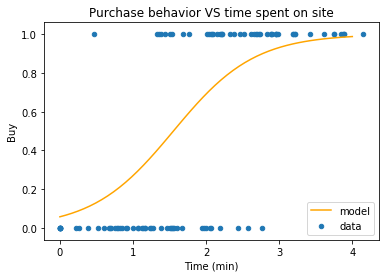

In [230]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [231]:
temp_class = model.predict(temp) > 0.5
print(temp_class[:5])

[[False]
 [False]
 [False]
 [False]
 [False]]


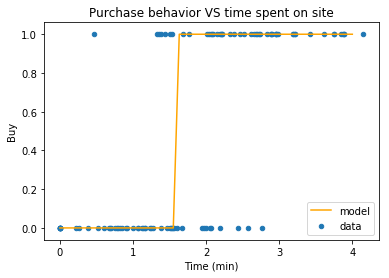

In [232]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [233]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [234]:
from sklearn.metrics import accuracy_score

In [235]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.810


### Train/Test split


In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [237]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [238]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [239]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [240]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.800
The test accuracy score is 0.900


## Cross Validation
train test split is not the best way, we can do many train test splits and eventually calculate the mean accuracy, this can be considered to be a better metric to evaluate our model.

One of the popular strategies is called k-fold cross validation. for examples split all data into k sets and the test set is a different set every time.

Split can be stratefied, meaning that if 20% of the images are cats and 80% are dogs, this is reflected in each fold as well. to preserve respresentation in the sets.

LOLO, LOPE cross validation, leave one label out, or leave p labels out. if you want to know how much someone needs to study to pass a class, this depends on individuals, so you need to take some users and only use them in training and other only in testing. This will allow the model to generalize better on new users, not only on general features. (label is not the target, but extra information that may identify data points)

The is parallelizable.

In [241]:
from keras.wrappers.scikit_learn import KerasClassifier

In [242]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [243]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [244]:
from sklearn.model_selection import cross_val_score, KFold

In [245]:
cv = KFold(3, shuffle=True)

In [246]:
scores = cross_val_score(model, X, y, cv=cv)

In [247]:
scores

array([ 0.79411765,  0.81818182,  0.81818182])

In [248]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8102 ± 0.0113


## Confusion Matrix

In [249]:
from sklearn.metrics import confusion_matrix

In [250]:
confusion_matrix(y, y_class_pred)

array([[38, 12],
       [ 7, 43]])

In [251]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [252]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,38,12
Buy,7,43


In [253]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [254]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.782
Recall:  	0.860
F1 Score:	0.819


In [255]:
from sklearn.metrics import classification_report

In [256]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.84      0.76      0.80        50
          1       0.78      0.86      0.82        50

avg / total       0.81      0.81      0.81       100



## Feature Preprocessing

### Categorical Features

In [92]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [93]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [96]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [97]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [98]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [99]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [100]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


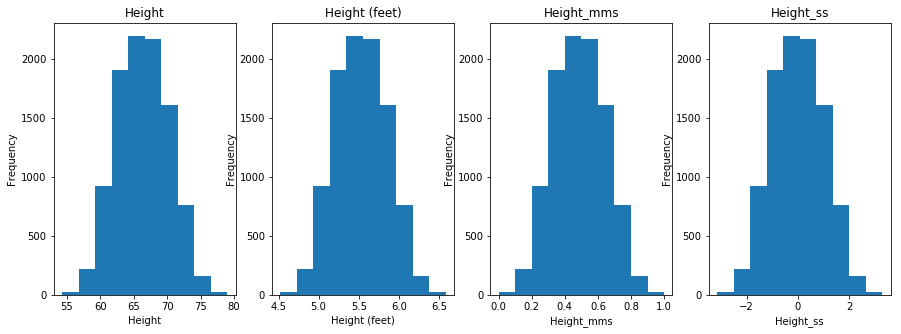

In [101]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [46]:
df = pd.read_csv("../data/housing-data.csv")
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


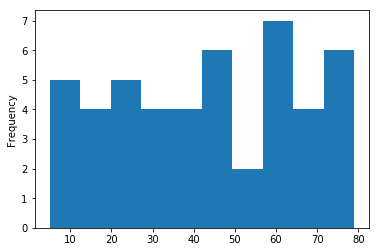

In [47]:
df['age'].plot(kind="hist")

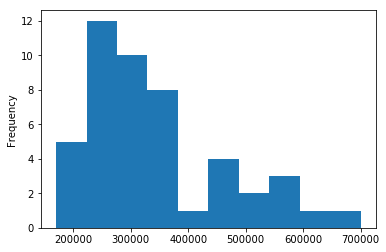

In [48]:
df['price'].plot(kind='hist')

In [49]:
X = df.as_matrix(columns=df.columns[:-1])
y = df['price'].values
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test),X_train.shape, y_train.shape

(37, 10, 37, 10, (37, 3), (37,))

In [51]:
model = Sequential()
model.add(Dense(1, input_shape=(3,), activation='sigmoid'))
model.compile(SGD(lr=0.8), 'mean_squared_error', metrics=['accuracy'])

NameError: name 'SGD' is not defined

In [362]:
model.fit(X_train, y_train)

Epoch 1/10
37/37 [==============================] - 0s - loss: 136950370414.7027 - acc: 0.0000e+00     
Epoch 2/10
37/37 [==============================] - 0s - loss: 136950359565.8378 - acc: 0.0000e+00     
Epoch 3/10
37/37 [==============================] - 0s - loss: 136950359565.8378 - acc: 0.0000e+00     
Epoch 4/10
37/37 [==============================] - 0s - loss: 136950355137.7297 - acc: 0.0000e+00     
Epoch 5/10
37/37 [==============================] - 0s - loss: 136950369307.6757 - acc: 0.0000e+00     
Epoch 6/10
37/37 [==============================] - 0s - loss: 136950356466.1622 - acc: 0.0000e+00     
Epoch 7/10
37/37 [==============================] - 0s - loss: 136950358680.2162 - acc: 0.0000e+00     
Epoch 8/10
37/37 [==============================] - 0s - loss: 136950355137.7297 - acc: 0.0000e+00     
Epoch 9/10
37/37 [==============================] - 0s - loss: 136950361779.8919 - acc: 0.0000e+00     
Epoch 10/10
37/37 [==============================] - 0s - loss: 

In [363]:
df['price'].min(), df['price'].max()

(169900, 699900)

In [378]:
mms = MinMaxScaler()
df['sqftmm'] = mms.fit_transform(df[['sqft']])
df['agemm'] = mms.fit_transform(df[['age']])
df['pricemm'] = mms.fit_transform(df[['price']])
df['bdrmsmm'] = mms.fit_transform(df[['bdrms']])

X = df[['sqftmm', 'bdrmsmm', 'agemm']].values
y = df['pricemm'].values

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test),X_train.shape, y_train.shape

(37, 10, 37, 10, (37, 3), (37,))

In [380]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

In [382]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [384]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.61203358249327189, 0.87820651223669566)

## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [78]:
df = pd.read_csv("../data/HR_comma_sep.csv")
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [79]:
df.shape

(14999, 10)

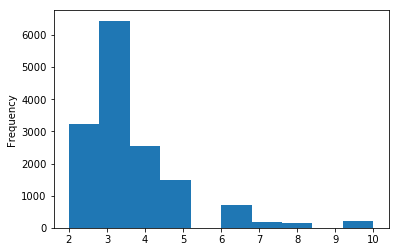

In [80]:
df['time_spend_company'].plot(kind='hist')

In [81]:
job_title_dummies = pd.get_dummies(df['sales'], prefix='sales')
salary_dummies = pd.get_dummies(df['sales'], prefix='salary')

mms = MinMaxScaler()
df['average_montly_hoursmm'] = mms.fit_transform(df[['average_montly_hours']])
df['number_projectmm'] = mms.fit_transform(df[['number_project']])
df['time_spend_companymm'] = mms.fit_transform(df[['time_spend_company']])

In [82]:
df = pd.concat([df, job_title_dummies, salary_dummies], axis=1, join_axes=[df.index])
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,average_montly_hoursmm,number_projectmm,...,salary_IT,salary_RandD,salary_accounting,salary_hr,salary_management,salary_marketing,salary_product_mng,salary_sales,salary_support,salary_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.490889,0.360611,...,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.233379,0.246518,...,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.280374,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.485981,0.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.696262,0.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
X = df[['satisfaction_level',
 'last_evaluation',
 'Work_accident',
 'promotion_last_5years',
 'average_montly_hoursmm',
 'number_projectmm',
 'time_spend_companymm',
 'sales_IT',
 'sales_RandD',
 'sales_accounting',
 'sales_hr',
 'sales_management',
 'sales_marketing',
 'sales_product_mng',
 'sales_sales',
 'sales_support',
 'sales_technical',
 'salary_IT',
 'salary_RandD',
 'salary_accounting',
 'salary_hr',
 'salary_management',
 'salary_marketing',
 'salary_product_mng',
 'salary_sales',
 'salary_support',
 'salary_technical']].values
y = df['left'].values

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

from sklearn.model_selection import train_test_split

In [100]:
X.shape, y.shape

((14999, 27), (14999,))

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape

((11999, 27), (11999,))

In [139]:
# model = Sequential()
# model.add(Dense(1, input_dim=3))
# model.compile(Adam(lr=0.1), 'mean_squared_error')
# model.fit(X_train, y_train, epochs=20)

# model.add(Dense(4, input_shape=(2,), activation='tanh'))
# model.add(Dense(2, activation='tanh'))
# model.add(Dense(1, activation='sigmoid')
          
model = Sequential()
model.add(Dense(4, input_dim=27, activation='sigmoid'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.3), 'binary_crossentropy')

In [140]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 4)                 112       
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 3         
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.fit(X_train, y_train)

Epoch 1/10
11999/11999 [==============================] - 1s - loss: 0.5646     
Epoch 2/10
11999/11999 [==============================] - 1s - loss: 0.5591     
Epoch 3/10
11999/11999 [==============================] - 1s - loss: 0.5616     
Epoch 4/10
11999/11999 [==============================] - 1s - loss: 0.5602     
Epoch 5/10
11999/11999 [==============================] - 1s - loss: 0.5661     
Epoch 6/10
11999/11999 [==============================] - 1s - loss: 0.5545     
Epoch 7/10
11999/11999 [==============================] - 1s - loss: 0.5603     
Epoch 8/10
11999/11999 [==============================] - 1s - loss: 0.5573     
Epoch 9/10
11999/11999 [==============================] - 1s - loss: 0.5573     
Epoch 10/10
11999/11999 [==============================] - 1s - loss: 0.5550     


In [113]:
y_test_pred = model.predict_classes(X_test)

  32/3000 [..............................] - ETA: 0s

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

In [119]:
def pretty_confusion_matrix(y_true, y_pred, labels=['False', 'True']):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted ' + l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [120]:
pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2230,38
Leave,694,38


In [121]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.76      0.98      0.86      2268
          1       0.50      0.05      0.09       732

avg / total       0.70      0.76      0.67      3000



In [122]:
from keras.wrappers.scikit_learn import KerasClassifier

In [128]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=27, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model, epochs=10, verbose=10)

In [129]:
from sklearn.model_selection import KFold, cross_val_score

In [130]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [131]:
scores

array([ 0.752     ,  0.74733333,  0.75333333,  0.79333333,  0.76225408])